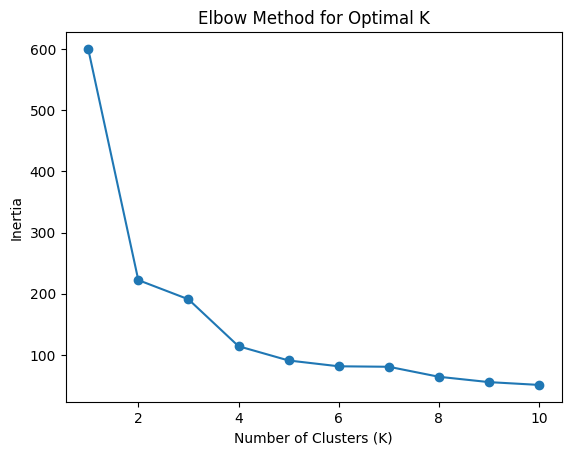

Silhouette Score: 0.4798814508199817


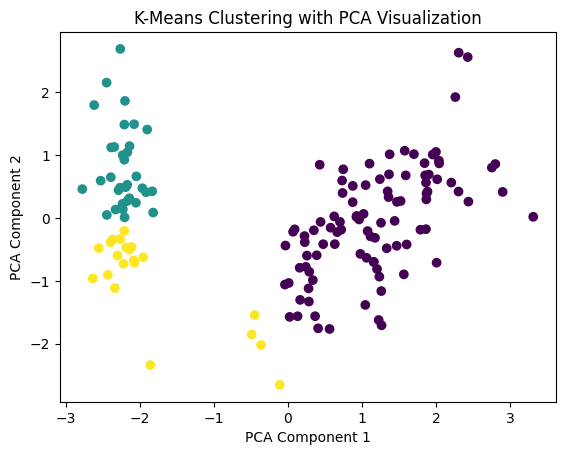

In [8]:
# ================================
# End-to-End Clustering Project
# K-Means + PCA Visualization
# Dataset: Iris
# ================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# -------------------------------
# 1. Load dataset
# -------------------------------
iris = load_iris()
X = iris.data
# print(iris)
# -------------------------------
# 2. Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. Elbow Method to find optimal K
# -------------------------------
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# -------------------------------
# 4. Apply K-Means clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# -------------------------------
# 5. Evaluate clustering
# -------------------------------
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# -------------------------------
# 6. PCA for dimensionality reduction
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# 7. Visualize clusters using PCA
# -------------------------------
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with PCA Visualization")
plt.show()


<function make_moons at 0x00000276AA10AF20>
Number of clusters: 2
Number of noise points: 1


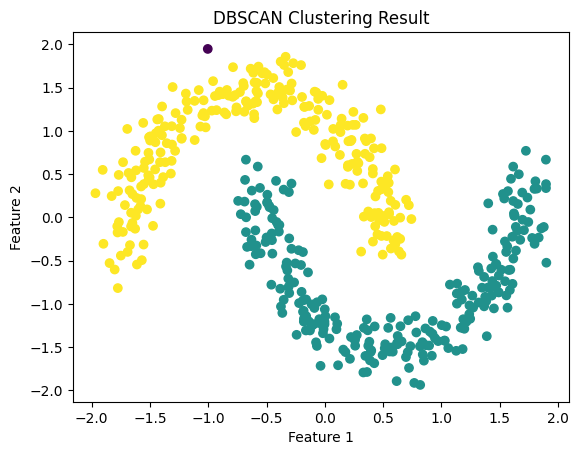

In [7]:
# ================================
# DBSCAN Clustering Project
# Dataset: make_moons (non-linear data)
# ================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# -------------------------------
# 1. Create dataset
# -------------------------------
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
print(make_moons)
# -------------------------------
# 2. Feature scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. Apply DBSCAN
# -------------------------------
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# -------------------------------
# 4. Cluster information
# -------------------------------
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

# -------------------------------
# 5. Visualize clusters
# -------------------------------
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Result")
plt.show()
